### Exploratory Data Analysis on Movie Data

## Scope:
This project is general analysis of movie data to determine which features contribute to successful movies. The first portion involves importing and cleaning the data, and although not all tables will be used, I preliminarily decided to go through and clean all of them. Once the data is cleaned, there are a few questions gleaned from the data that I think are worth answering. There is a significant amount of additional insights that can be drawn from this data, but these are the questions I will focus on:

1. [What is a reasonable budget and net profit for a movie?](#Question1)
2. [Who are the top competitors?](#Question2)
3. [Which director/s should be considered to hire?](#Question3)
4. [Which genres have the highest net profit?](#Question4)



# Importing and cleaning the data

Here is a general overview of steps taken to clean the data before drawing conclusions.

 - Importing all csv files into pandas dataframes
 - Inspecting the data to get an initial preview and general understanding of the data
 - Replacing missing values as necessary
 - Dropping any unnecessary columns
 - Updating columns to a useable data type

In [75]:
#Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import data into a pandas dataframe

In [76]:
#Import data into pandas dataframes
movie_gross_df = pd.read_csv('Data/bom.movie_gross.csv')
movie_basics_df = pd.read_csv('Data/name.basics.csv')
movie_title_akas_df = pd.read_csv('Data/title.akas.csv')
movie_title_basics_df = pd.read_csv('Data/title.basics.csv')
movie_title_crew_df = pd.read_csv('Data/title.crew.csv', )
movie_title_principals_df = pd.read_csv('Data/title.principals.csv')
movie_title_ratings_df = pd.read_csv('Data/title.ratings.csv')
movie_info_df = pd.read_csv('Data/rt.movie_info.tsv', sep='\t')
movie_reviews_df = pd.read_csv('Data/rt.reviews.tsv', sep='\t', encoding='cp1252')
tmdb_movies_df = pd.read_csv('Data/tmdb.movies.csv')
movie_budgets_df = pd.read_csv('Data/tn.movie_budgets.csv')

Preview all dataframes to determine if everything loaded properly and get an initial look at the data.

In [77]:
all_dfs = [movie_gross_df, movie_basics_df, movie_title_akas_df, movie_title_basics_df,
             movie_title_crew_df, movie_title_principals_df, movie_title_ratings_df, movie_info_df,
             movie_reviews_df, tmdb_movies_df, movie_budgets_df]
df_names = ['movie_gross', 'movie_basics', 'movie_title_akas', 'movie_title_basics',
           'movie_title_crew', 'movie_title_principals', 'movie_title_ratings', 'movie_info',
           'movie_reviews', 'tmdb_movies', 'movie_budgets']
for i in range(len(all_dfs)):
    print(df_names[i], '\n')
    display(all_dfs[i].info())
    display(all_dfs[i].head())

movie_gross 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


movie_basics 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


None

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


movie_title_akas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


None

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


movie_title_basics 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


movie_title_crew 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


None

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


movie_title_principals 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


None

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


movie_title_ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


movie_info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


movie_reviews 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


None

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


tmdb_movies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


movie_budgets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


After scanning the output, we notice here are a few columns among all the dataframes that have a majority of their values missing. Dropping these columns as they do not provide any value for this particular project.

In [78]:
#Use pandas drop method to remove columns
movie_basics_df.drop(['birth_year', 'death_year'], axis=1, inplace=True)
movie_title_akas_df.drop(['language', 'attributes', 'types'], axis=1, inplace=True)
movie_title_principals_df.drop(['job', 'characters'], axis=1, inplace=True)

Working through each dataframe to deal with missing values and updating to appropriate data types as necessary, beginning with the movie_gross_df.

In [79]:
#Preview the data
display(movie_gross_df.info())
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [80]:
#Fill missing values for studio column with 'Missing', fill domestic_gross and foreign_gross missing values with median
movie_gross_df['studio'].fillna('Missing', inplace=True)
movie_gross_df['domestic_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)
movie_gross_df['foreign_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)

In [81]:
#Preview info to ensure missing values were taken care of
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [82]:
#Remove extraneous comma
movie_gross_df['foreign_gross'].replace(',', '', regex=True, inplace=True)

In [83]:
#Change foreign_gross to float64
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype('float64')

In [84]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [85]:
#Preview the data
display(movie_basics_df.info())
movie_basics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              606648 non-null  object
 1   primary_name        606648 non-null  object
 2   primary_profession  555308 non-null  object
 3   known_for_titles    576444 non-null  object
dtypes: object(4)
memory usage: 18.5+ MB


None

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [86]:
#Fill missing data with 'missing' as matches string data type
movie_basics_df.fillna('missing', inplace=True)

#Double-check that this worked
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              606648 non-null  object
 1   primary_name        606648 non-null  object
 2   primary_profession  606648 non-null  object
 3   known_for_titles    606648 non-null  object
dtypes: object(4)
memory usage: 18.5+ MB


In [87]:
#Preview the data
display(movie_title_akas_df.info())
movie_title_akas_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.7+ MB


None

,title_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0.0
1,tt0369610,11,Jurashikku warudo,JP,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0.0
4,tt0369610,14,Jurassic World,FR,0.0


In [88]:
#Check value counts for is_original_title
movie_title_akas_df['is_original_title'].value_counts()

#Since majority are zeros, update the 3 missing values to zero
movie_title_akas_df['is_original_title'].fillna(0.0, inplace=True)

#Fill missing region with 'missing'
movie_title_akas_df['region'].fillna('missing', inplace=True)

#Double-check that missing values are filled
movie_title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             331703 non-null  object 
 4   is_original_title  331703 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.7+ MB


In [89]:
#Preview the data
display(movie_title_basics_df.info())
movie_title_basics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [90]:
#Impute missing values with the mean of runtime_minutes
movie_title_basics_df['runtime_minutes'].fillna(movie_title_basics_df.runtime_minutes.mean(), inplace=True)

#Fill genres and original_title missing values with 'Missing'
movie_title_basics_df['genres'].fillna('Missing', inplace=True)
movie_title_basics_df['original_title'].fillna('Missing', inplace=True)

#Ensure changes worked
movie_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [91]:
#Preview the data
display(movie_title_crew_df.info())
movie_title_crew_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


None

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [92]:
#Fill missing values with 'missing'
movie_title_crew_df.fillna('missing', inplace=True)

#Ensure changes worked
movie_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  146144 non-null  object
 2   writers    146144 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [93]:
#Preview the data
display(movie_title_principals_df.info())
movie_title_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   ordering  1028186 non-null  int64 
 2   nconst    1028186 non-null  object
 3   category  1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


None

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


In [94]:
display(movie_title_ratings_df.info())
movie_title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [95]:
display(movie_info_df.info())
movie_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [96]:
#Fill synposis, genre, director, writer, currency, studio, rating missing values with 'Missing'
movie_info_df['synopsis'].fillna('Missing', inplace=True)
movie_info_df['genre'].fillna('Missing', inplace=True)
movie_info_df['director'].fillna('Missing', inplace=True)
movie_info_df['writer'].fillna('Missing', inplace=True)
movie_info_df['currency'].fillna('Missing', inplace=True)
movie_info_df['studio'].fillna('Missing', inplace=True)
movie_info_df['rating'].fillna('Missing', inplace=True)

In [97]:
#Fill theater_date and dvd_date missing values with "Jan 1, 1000" to keep same format
movie_info_df['theater_date'].fillna('Jan 1, 1000', inplace=True)
movie_info_df['dvd_date'].fillna('Jan 1, 1000', inplace=True)

In [98]:
#Fill box_office missing valus with 0
movie_info_df['box_office'].fillna(0, inplace=True)

In [99]:
#Remove 'minutes' from runtime, change data type to float64 and impute missing values with mean
movie_info_df['runtime'].replace('minutes', '', regex=True, inplace=True)
movie_info_df['runtime'] = movie_info_df['runtime'].astype('float64')
movie_info_df['runtime'].fillna(movie_info_df.runtime.mean(), inplace=True)

#Check to ensure all changes to this df worked
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1560 non-null   object 
 2   rating        1560 non-null   object 
 3   genre         1560 non-null   object 
 4   director      1560 non-null   object 
 5   writer        1560 non-null   object 
 6   theater_date  1560 non-null   object 
 7   dvd_date      1560 non-null   object 
 8   currency      1560 non-null   object 
 9   box_office    1560 non-null   object 
 10  runtime       1560 non-null   float64
 11  studio        1560 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


In [100]:
#Preview the data
display(movie_reviews_df.info())
movie_reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


None

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [101]:
#Fill missing values in review, rating, critic, publisher columns with 'Missing'
movie_reviews_df['review'].fillna('Missing', inplace=True)
movie_reviews_df['rating'].fillna('Missing', inplace=True)
movie_reviews_df['critic'].fillna('Missing', inplace=True)
movie_reviews_df['publisher'].fillna('Missing', inplace=True)

#Ensure changes worked
movie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      54432 non-null  object
 2   rating      54432 non-null  object
 3   fresh       54432 non-null  object
 4   critic      54432 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54432 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [102]:
display(tmdb_movies_df.info())
tmdb_movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [103]:
#Drop Unnamed column
tmdb_movies_df.drop(columns=['Unnamed: 0'], inplace=True)

In [104]:
#Change release_date to datetime format
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])
#Check to ensure changes worked
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [105]:
display(movie_budgets_df.info())
movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [106]:
#Change production_budget, domestic_gross and worldwide_gross to float64
#Remove dollar sign and commas before changing data type

movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', '')
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace('$', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', '')

movie_budgets_df['production_budget'].replace(',', '', regex=True, inplace=True)
movie_budgets_df['domestic_gross'].replace(',', '', regex=True, inplace=True)
movie_budgets_df['worldwide_gross'].replace(',', '', regex=True, inplace=True)

movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype('float64')
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype('float64')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype('float64')

In [107]:
#Convert release_date to datetime format
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
#Ensure changes worked
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [108]:
#Drop any duplicates
movie_budgets_df.drop_duplicates(subset=['movie', 'release_date'], keep='first', inplace=True)
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 316.2+ KB


After cleaning the data, it's time to analyze and explore the data. It makes sense to get a general understanding of which movies have the highest net profit and then dive into the factors that contribute to successful movies (i.e. genre/s, directors, producers, cast, etc.). The movie_budgets_df gives the production budget along with the worldwide gross revenue, so below I am pulling the top 25 movies with the highest net profit from this dataframe.

In [109]:
#Create two new columns: gross_profit and profit_margin (Drop any movies with 0 gross revenue)
movie_budgets_df['net_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
movie_budgets_df['profit_margin'] = round(movie_budgets_df['net_profit'] / movie_budgets_df['worldwide_gross'], 4)
movie_budgets_df.profit_margin.replace(-np.inf, np.nan, inplace=True)
movie_budgets_df.dropna(inplace=True)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.8469
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.6073
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.3370
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.7644
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,0.7593


In [110]:
movie_budgets_df[movie_budgets_df['profit_margin'] == movie_budgets_df.profit_margin.min()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin
5302,3,2015-12-11,American Hero,1000000.0,0.0,26.0,-999974.0,-38460.5385


In [111]:
#Sort by gross_profit to see most successful movies
top_25_net_profit = movie_budgets_df.sort_values(by='net_profit', ascending=False)[:25]

c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


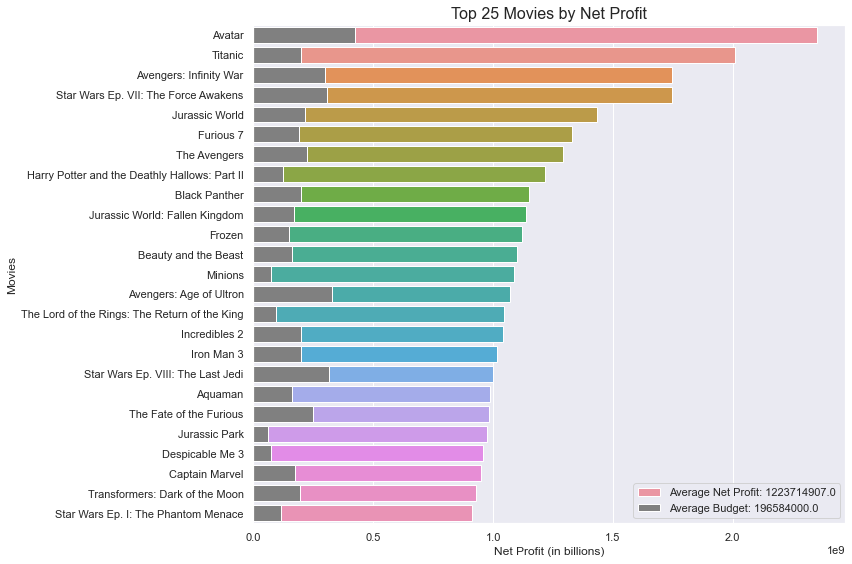

In [112]:
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.barplot(top_25_net_profit['net_profit'], top_25_net_profit['movie'], 
            label='Average Net Profit: {}'.format(round(top_25_net_profit['net_profit'].mean(), 0)))
sns.barplot(top_25_net_profit['production_budget'], top_25_net_profit['movie'], color='gray', 
            label='Average Budget: {}'.format(top_25_net_profit['production_budget'].mean()))
plt.title('Top 25 Movies by Net Profit', fontsize=16)
plt.xlabel('Net Profit (in billions)')
plt.ylabel('Movies')
plt.legend()
plt.tight_layout()
plt.savefig('Question1_top25movies.png')
plt.show()

The average net profit for the top 25 movies is over 1.2 billion with an average budget over 196 million. What exactly made these movies successful? Let's take a look at how budget correlates with net profit.

<a id="Question1"></a>
# Question 1: What is a reasonable budget and net profit for a movie?

This is a two-part question. First, based on net profit and budgets of other movies, what is the right amount that should be budgeted to make a successful movie? Below, we can see the correlation between budget and net profit.

Pearson's correlation: 0.61


c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


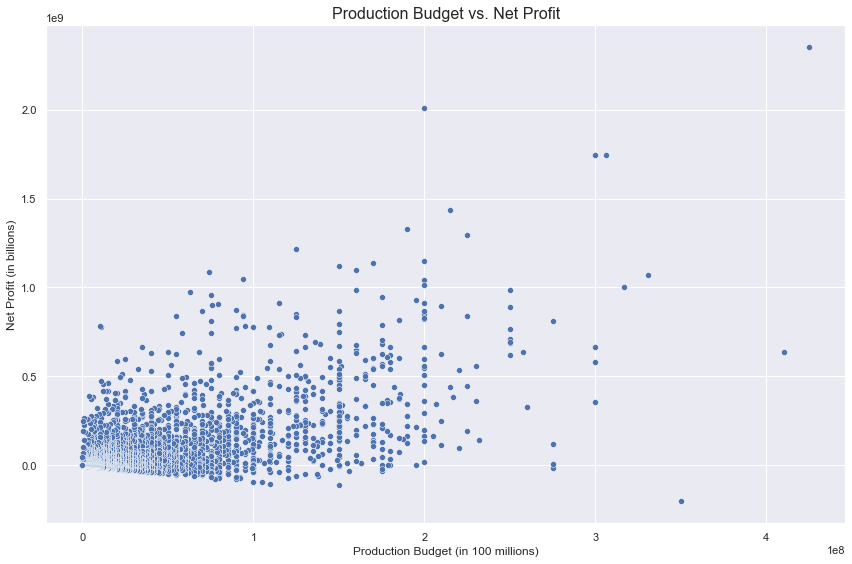

In [113]:
#Print the Pearson's correlation for production budget and gross profit
corr, _ = pearsonr(movie_budgets_df['production_budget'], movie_budgets_df['net_profit'])
print("Pearson's correlation: {}".format(round(corr, 2)))

#Create a scatterplot of production budget and gross profit
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(movie_budgets_df['production_budget'], movie_budgets_df['net_profit'])
ax.set_title('Production Budget vs. Net Profit', fontsize=16)
ax.set_xlabel('Production Budget (in 100 millions)')
ax.set_ylabel('Net Profit (in billions)')
plt.tight_layout()
plt.savefig('Question1_budget_vs_netprofit.png')
plt.show()

At first glance, it seems that budget and net profit have a decent correlation of .61, but since we're choosing a budget between 0 and over 400 million, we should break this down a little more to get a better idea of what to spend. Below are several budget ranges and how they correlate to net profit.

Pearson's correlation less than 100 million: 0.36
Pearson's correlation between 100 and 200 million: 0.2
Pearson's correlation between 200 and 300 million: -0.06
Pearson's correlation between 300 and 400 million: -0.94
Pearson's correlation more than 400 million: 1.0


c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

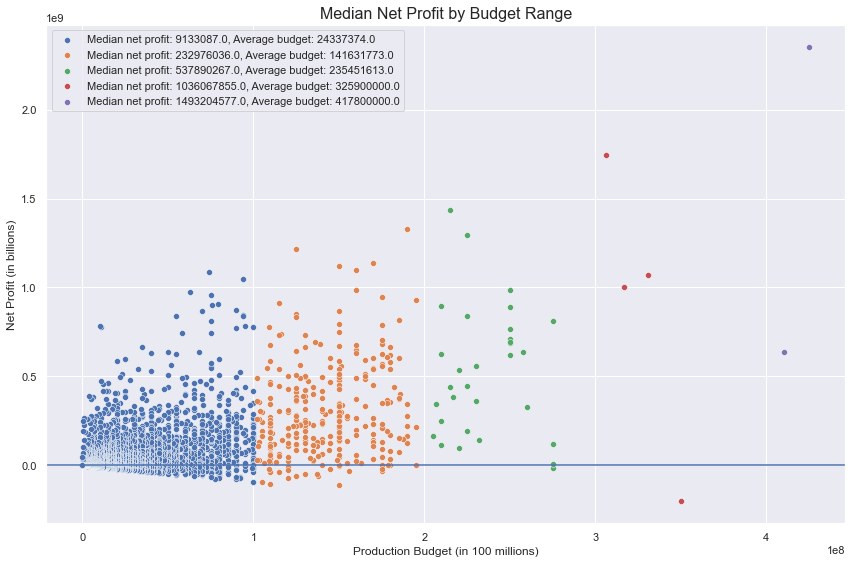

In [114]:
#Create separate dataframes for each budget range
less_than_100_mil = movie_budgets_df[movie_budgets_df['production_budget'] <= 100000000]
bet_100_200_mil = movie_budgets_df[(movie_budgets_df['production_budget'] > 100000000) 
                                   & (movie_budgets_df['production_budget'] < 200000000)]
bet_200_300_mil = movie_budgets_df[(movie_budgets_df['production_budget'] > 200000000) 
                                   & (movie_budgets_df['production_budget'] < 300000000)]
bet_300_400_mil = movie_budgets_df[(movie_budgets_df['production_budget'] > 300000000) 
                                   & (movie_budgets_df['production_budget'] < 400000000)]
more_than_400_mil = movie_budgets_df[(movie_budgets_df['production_budget'] > 400000000) 
                                   & (movie_budgets_df['production_budget'] < 500000000)]

#Print the correlation for each of these ranges
corr, _ = pearsonr(less_than_100_mil['production_budget'], less_than_100_mil['net_profit'])
print("Pearson's correlation less than 100 million: {}".format(round(corr, 2)))
corr, _ = pearsonr(bet_100_200_mil['production_budget'], bet_100_200_mil['net_profit'])
print("Pearson's correlation between 100 and 200 million: {}".format(round(corr, 2)))
corr, _ = pearsonr(bet_200_300_mil['production_budget'], bet_200_300_mil['net_profit'])
print("Pearson's correlation between 200 and 300 million: {}".format(round(corr, 2)))
corr, _ = pearsonr(bet_300_400_mil['production_budget'], bet_300_400_mil['net_profit'])
print("Pearson's correlation between 300 and 400 million: {}".format(round(corr, 2)))
corr, _ = pearsonr(more_than_400_mil['production_budget'], more_than_400_mil['net_profit'])
print("Pearson's correlation more than 400 million: {}".format(round(corr, 2)))

#Plot scatterplots of each budget range compared to gross profit
plt.figure(figsize=(12, 8))
sns.scatterplot(less_than_100_mil['production_budget'], less_than_100_mil['net_profit'], 
                label='Median net profit: {}, Average budget: {}'.format(round(less_than_100_mil['net_profit'].median(), 0),
                                                       round(less_than_100_mil['production_budget'].mean(), 0)))
sns.scatterplot(bet_100_200_mil['production_budget'], bet_100_200_mil['net_profit'], 
                label='Median net profit: {}, Average budget: {}'.format(round(bet_100_200_mil['net_profit'].median(), 0),
                                                       round(bet_100_200_mil['production_budget'].mean(), 0)))
sns.scatterplot(bet_200_300_mil['production_budget'], bet_200_300_mil['net_profit'], 
                label='Median net profit: {}, Average budget: {}'.format(round(bet_200_300_mil['net_profit'].median(), 0),
                                                       round(bet_200_300_mil['production_budget'].mean(), 0)))
sns.scatterplot(bet_300_400_mil['production_budget'], bet_300_400_mil['net_profit'], 
                label='Median net profit: {}, Average budget: {}'.format(round(bet_300_400_mil['net_profit'].median(), 0),
                                                       round(bet_300_400_mil['production_budget'].mean(), 0)))
sns.scatterplot(more_than_400_mil['production_budget'], more_than_400_mil['net_profit'], 
                label='Median net profit: {}, Average budget: {}'.format(round(more_than_400_mil['net_profit'].median(), 0),
                                                       round(more_than_400_mil['production_budget'].mean(), 0)))
plt.axhline(0)

plt.title('Median Net Profit by Budget Range', fontsize=16)
plt.xlabel('Production Budget (in 100 millions)')
plt.ylabel('Net Profit (in billions)')
plt.tight_layout()
plt.savefig('Question1_mediannetprof_budgetrange.png')
plt.legend()
plt.show()

When looking at the correlation for each budget range, they're all completely different. Although our overall correlation was .61, it's obvious that not all movies with a higher budget have a higher net profit. The blue horizontal line above demonstrates that there are several movies with higher budgets but weren't profitable at all. An additional plot below highlights these movies and their correlation to budget.

Pearson's correlation: -0.69


c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


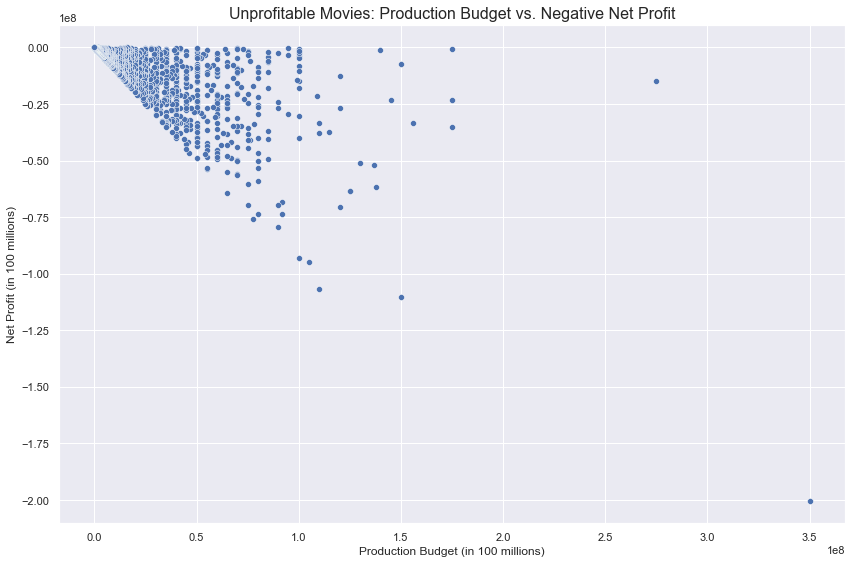

In [115]:
#Create dataframe of unprofitable movies
unprofitable_movies = movie_budgets_df[(movie_budgets_df['net_profit'] < 0)]

#Calculate the correlation between budget and negative profit
corr, _ = pearsonr(unprofitable_movies['production_budget'], unprofitable_movies['net_profit'])
print("Pearson's correlation: {}".format(round(corr, 2)))

#Plot the correlation between budget and negative profit
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(unprofitable_movies['production_budget'], unprofitable_movies['net_profit'])
ax.set_title('Unprofitable Movies: Production Budget vs. Negative Net Profit', fontsize=16)
ax.set_xlabel('Production Budget (in 100 millions)')
ax.set_ylabel('Net Profit (in 100 millions)')
plt.tight_layout()
plt.savefig('Question1_unprof_budget_netprof.png')
plt.show()

### Answer to Question 1 (part 1):

A negative correlation of -0.69 for the budget and net profit of the unprofitable movies is evidence that higher budget does not always mean higher profit. Even if the overall correlation between budget and net profit seems moderately strong, it would be unwise to determine a specific budget amount based on that correlation alone. In reality, you would determine an appropriate budget amount after calculating all potential expenses, but with this information we can at least determine a profit margin to shoot for based on profit margins of successful movies. In this case, we will just be looking at movies that had a positive net profit.

c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


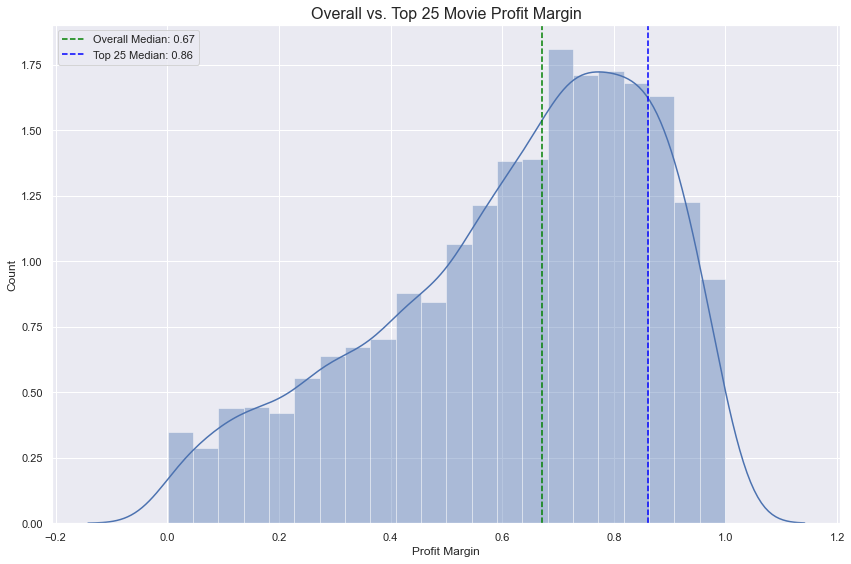

In [116]:
#Filter out movies with no profit and filter top 25
profitable_movies = movie_budgets_df[(movie_budgets_df['profit_margin'] > 0)]
profitable_movies = profitable_movies.sort_values(by='net_profit', ascending=False)
overall_median = profitable_movies.profit_margin.median()
top_25_median = profitable_movies.profit_margin[:25].median()

#Plot the overall median and top 25 median
plt.figure(figsize=(12, 8))
sns.distplot(profitable_movies.profit_margin)
plt.axvline(overall_median, linestyle='--', color='green', 
            label='Overall Median: {}'.format(round(overall_median, 2)))
plt.axvline(top_25_median, linestyle = '--', color='blue', 
            label='Top 25 Median: {}'.format(round(top_25_median, 2)))
plt.title('Overall vs. Top 25 Movie Profit Margin', fontsize=16)
plt.xlabel('Profit Margin')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('Question1_profitmargin')
plt.show()

### Answer to Question 1 (part 2):

The median profit margin for all movies that were profitable is 67% compared to the top 25 movies at 86%. This is how we can measure our success, so my recommendation would be to have a goal for a profit margin higher than 67% and a stretch goal of 86%. Another area that helps us gauge a successful movie is measuring against competitors. So who are they?

<a id="Question2"></a>
# Question 2: Who are the top competitors?

Who are the top studios we would potentially be competing against? To get this answer, we need to merge the movie_budgets dataframe with the movie dataframe.

In [117]:
#Combine movie_budgets_df and movie_gross_df on movie titles
studios_df = movie_budgets_df.merge(movie_gross_df, left_on='movie', right_on='title', how='inner')

#Drop rows with studio = 'Missing'
studios_df = studios_df[studios_df['studio'] != 'Missing']

#Drop GrtIndia studio as it would not be considered a competitor
studios_df = studios_df[studios_df['studio'] != 'GrtIndia']

#Create two separate dataframes sorted by top net profit and total movie count
studios_profit = pd.DataFrame(studios_df.groupby('studio')['net_profit'].sum())
studios_profit['total_movies'] = studios_df.groupby('studio')['studio'].count()
studios_profit['average_net_profit'] = studios_profit.net_profit / studios_profit.total_movies
studios_profit = studios_profit.sort_values(by='average_net_profit', ascending=False)[:25]
studios_count = studios_profit.sort_values(by='total_movies', ascending=False)[:25]

In [118]:
studios_df

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,net_profit,profit_margin,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.6073,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.7644,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.8535,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,0.5426,Justice League,WB,229000000.0,428900000.0,2017
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,0.6589,Spectre,Sony,200100000.0,680600000.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,68,2012-04-27,Sound of My Voice,135000.0,408015.0,4.294480e+05,2.944480e+05,0.6856,Sound of My Voice,FoxS,408000.0,1400000.0,2012
1239,73,2012-06-15,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,2.970593e+06,0.9612,Your Sister's Sister,IFC,1600000.0,1400000.0,2012
1240,80,2015-07-10,The Gallows,100000.0,22764410.0,4.165647e+07,4.155647e+07,0.9976,The Gallows,WB (NL),22800000.0,20200000.0,2015
1241,86,2017-07-07,A Ghost Story,100000.0,1594798.0,2.769782e+06,2.669782e+06,0.9639,A Ghost Story,A24,1600000.0,1400000.0,2017


c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


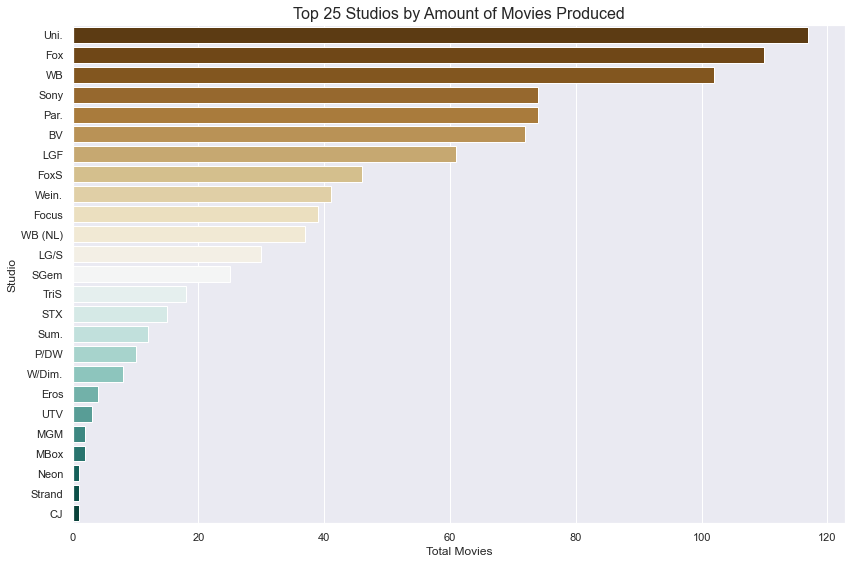

In [119]:
#Plot the top 25 studios by movies produced
plt.figure(figsize=(12, 8))
sns.barplot(studios_count.total_movies, studios_count.index, palette='BrBG')
plt.title('Top 25 Studios by Amount of Movies Produced', fontsize=16)
plt.xlabel('Total Movies')
plt.ylabel('Studio')
plt.tight_layout()
plt.savefig('Question2_Top25Studios_MoviesMade.png')
plt.show()

Universal, Fox, and Warner Brothers are the top three studios with over 100 movies each. Based on the amount of movies made, they could be potential competitors. Since net profit is the defining factor of a success, let's take a look at average net profit per studio.

c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


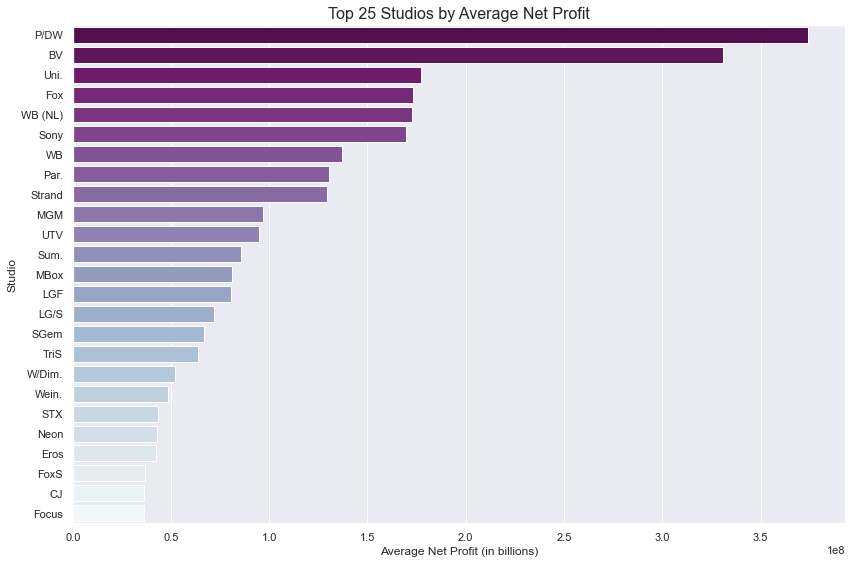

In [120]:
#Plot the top 25 studios by average net profit
plt.figure(figsize=(12, 8))
sns.barplot(studios_profit.average_net_profit, studios_profit.index, palette='BuPu_r')
plt.title('Top 25 Studios by Average Net Profit', fontsize=16)
plt.xlabel('Average Net Profit (in billions)')
plt.ylabel('Studio')
plt.tight_layout()
plt.savefig('Question2_Top25Studios_NetProfit')
plt.show()

### Answer to Question 2:

The plot above clearly shows top 25 competitors in the movie industry based on average net profit. These are the studios that we should look to compete against.

There are a number of factors that go into making a movie, and we won't dive into all of them here, but here are a couple questions to consider to contribute to making a movie successful.

<a id="Question3"></a>
# Question 3: Which director should we consider hiring?

First, we will look at the net profit vs. count of movies directed to see if there are any trends. This involves merging multiple dataframes to visualize the data.

In [122]:
#Merge dataframes with an inner join
genres_df = movie_budgets_df.merge(movie_title_basics_df, left_on='movie', right_on='original_title', how='inner')
crew_df = genres_df.merge(movie_title_crew_df, left_on='tconst', right_on='tconst', how='inner')
combined_df = crew_df.merge(movie_basics_df, left_on='directors', right_on='nconst', how='inner')

#Preview the data
display(combined_df.info())
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2826 non-null   int64         
 1   release_date        2826 non-null   datetime64[ns]
 2   movie               2826 non-null   object        
 3   production_budget   2826 non-null   float64       
 4   domestic_gross      2826 non-null   float64       
 5   worldwide_gross     2826 non-null   float64       
 6   net_profit          2826 non-null   float64       
 7   profit_margin       2826 non-null   float64       
 8   tconst              2826 non-null   object        
 9   primary_title       2826 non-null   object        
 10  original_title      2826 non-null   object        
 11  start_year          2826 non-null   int64         
 12  runtime_minutes     2826 non-null   float64       
 13  genres              2826 non-null   object      

None

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,primary_profession,known_for_titles
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.6073,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
1,45,2018-12-19,Mary Poppins Returns,130000000.0,171958438.0,3.415285e+08,2.115285e+08,0.6194,tt5028340,Mary Poppins Returns,Mary Poppins Returns,2018,130.0,"Comedy,Family,Fantasy",nm0551128,"nm0871308,nm1341735,nm0551128,nm0217896",nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
2,77,2014-12-25,Into the Woods,56200000.0,128002372.0,2.131164e+08,1.569164e+08,0.7363,tt2180411,Into the Woods,Into the Woods,2014,125.0,"Adventure,Comedy,Drama",nm0551128,nm0487567,nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
3,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.3370,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",nm1334526,Simon Kinberg,"producer,writer,director","tt1502712,tt3315342,tt1877832,tt3659388"
4,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.7644,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521"


In [123]:
#Create top directors df
director_counts = pd.DataFrame(combined_df.groupby('primary_name')['movie'].count())
director_net_profit = pd.DataFrame(combined_df.groupby('primary_name')['net_profit'].sum())
top_directors_df = director_counts.merge(director_net_profit, left_on=director_counts.index, 
                                         right_on=director_net_profit.index, how='outer')
top_directors_df = top_directors_df.sort_values(by='net_profit', ascending=False)

c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


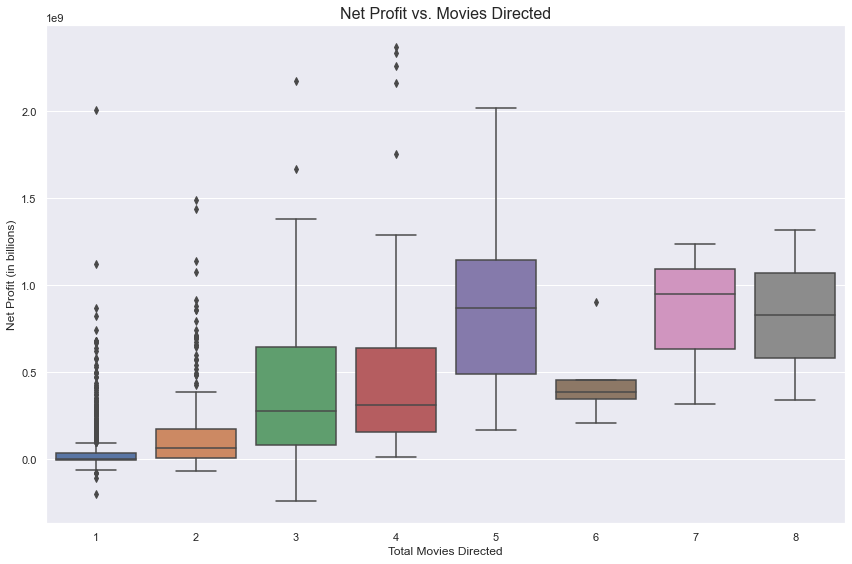

In [124]:
# Plot net profit vs. count of movies directed 
plt.figure(figsize=(12,8))
sns.boxplot(top_directors_df.movie, top_directors_df.net_profit)
plt.title('Net Profit vs. Movies Directed', fontsize=16)
plt.xlabel('Total Movies Directed')
plt.ylabel('Net Profit (in billions)')
plt.tight_layout()
plt.savefig('Question3_netprof_vs_moviesdirected.png')
plt.show()

From the plot above, it is safe to conclude that hiring directors having 4 or more movies almost always results in positive net profit. Let's look at which directors who have directed 4 or more movies also have the highest average net profit.

c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


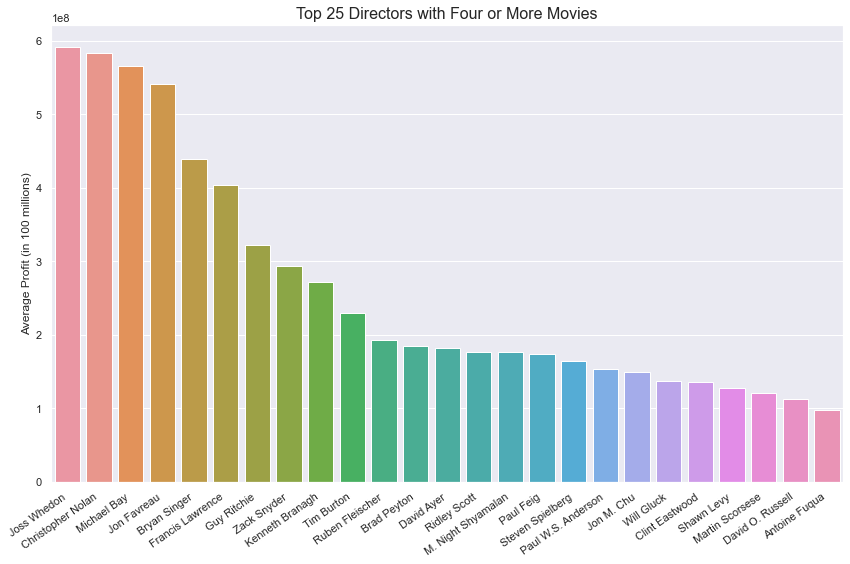

In [125]:
#Filter dataframe with 4 or more movies, top 25 by net profit
four_or_more_movies = top_directors_df[(top_directors_df['movie'] >= 4) &
                                      (top_directors_df['net_profit'] > 0)][:25]

four_or_more_movies['average_profit'] = four_or_more_movies.net_profit / four_or_more_movies.movie
four_or_more_movies = four_or_more_movies.sort_values(by='average_profit', ascending=False)

#Plot bar graph
plt.figure(figsize=(12, 8))
sns.barplot(four_or_more_movies.key_0, four_or_more_movies.average_profit)
plt.xticks(rotation=35, horizontalalignment='right')
plt.xlabel(None)
plt.ylabel('Average Profit (in 100 millions)')
plt.title('Top 25 Directors with Four or More Movies', fontsize=16)
plt.tight_layout()
plt.savefig('Question3_Top25Directors.png')
plt.show()

### Answer to Question 3:

All of the directors above had very successful movies. To narrow it down, I would recommend one of the top 4 directors, each with an average net profit over 500 million: Joss Whedon, Christopher Nolan, Michael Bay, or Jon Favreau. Now moving on to another attribute that may contribute to making a successful movie.

<a id="Question4"></a>
# Question 4: Which genres have the highest net profit?

Utilizing the previously created genres dataframe, we first have to split the list of genres into separate columns, fill missing values, then aggregate these columns based on net profit and the total genre counts to determine genre popularity vs. net profit.

In [126]:
#Split genres into separate columns and add to genres_df
genre = genres_df['genres'].str.split(',', expand=True)
genres_df['genre1'] = genre[0]
genres_df['genre2'] = genre[1]
genres_df['genre3'] = genre[2]

In [127]:
#Fill missing values with 'Missing'
genres_df['genre1'].fillna('Missing', inplace=True)
genres_df['genre2'].fillna('Missing', inplace=True)
genres_df['genre3'].fillna('Missing', inplace=True)

In [128]:
#Group genres by sum of net profit
genre_profit1 = genres_df.groupby(['genre1'])['net_profit'].sum()
genre_profit2 = genres_df.groupby(['genre2'])['net_profit'].sum()
genre_profit3 = genres_df.groupby(['genre3'])['net_profit'].sum()

#Combine into pandas data frame and drop 'Missing'
genre_profit = pd.DataFrame(pd.concat([genre_profit1, genre_profit2, genre_profit3]))
genre_profit = genre_profit.drop('Missing')
genre_profit = pd.DataFrame(genre_profit.groupby(genre_profit.index)['net_profit'].sum())

In [129]:
#Group genres by total counts of each genre
genre1 = genres_df.genre1.value_counts()
genre2 = genres_df.genre2.value_counts()
genre3 = genres_df.genre3.value_counts()

#Combine into pandas data frame and drop 'Missing'
genre_counts = pd.DataFrame(pd.concat([genre1, genre2, genre3]))
genre_counts = genre_counts.drop('Missing')
genre_counts = pd.DataFrame(genre_counts.groupby(genre_counts.index)[0].sum())
genre_counts.columns = ['counts']

#Merge the genre net profit and total counts dataframe
genre_final = genre_profit.merge(genre_counts, left_index=True, right_index=True)
genre_final['average_profit'] = genre_final.net_profit / genre_final.counts
genre_final = genre_final.sort_values(by='average_profit', ascending=False)

c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Elvis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


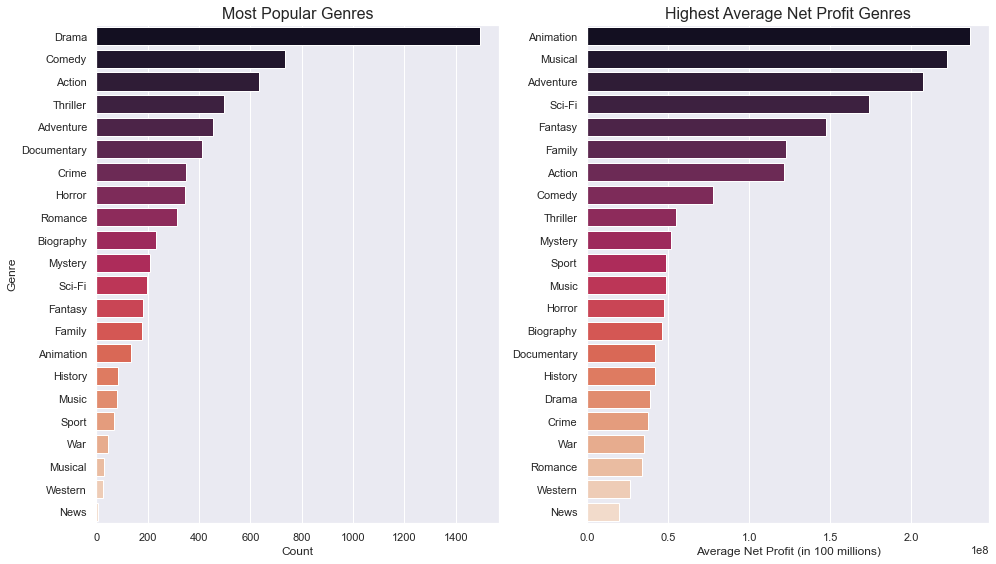

In [130]:
#Create two dataframes sorted by count and average profit
top_genre_counts = genre_final.sort_values(by='counts', ascending=False)
top_genre_profit = genre_final.sort_values(by='average_profit', ascending=False)

#Plot most popular genres and highest average profit genres
plt.figure(figsize=(14, 8))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(top_genre_counts.counts, top_genre_counts.index, palette="rocket")
ax1.set_title('Most Popular Genres', fontsize=16)
ax1.set(xlabel='Count', ylabel='Genre')

ax2 = plt.subplot(1, 2, 2)
sns.barplot(top_genre_profit.average_profit, top_genre_profit.index, palette="rocket")
ax2.set_title('Highest Average Net Profit Genres', fontsize=16)
ax2.set(xlabel='Average Net Profit (in 100 millions)', ylabel='')
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.savefig('Question4_popgenres_netprof.png')
plt.show()

### Answer to Question 4:

Drama is the most popular genre by far with a total of 1493 movies, almost doubling the amount of comedy movies at 733. As we can see in the plots above, the most popular genre isn't necessarily the most successful. Looking at the highest average net profit per genre, Animation wins with a net profit average of over 236 million. My recommendation would be to choose genres based on net profit and not popularity. Since a large portion of movies have multiple genres, I would combine the genres with the highest net profit and that make sense as a combination. For example, Animation, Sci-Fi, and Fantasy would be a sensible combination with high net profit.

# Conclusion:

In the brief analysis above, we determined what a reasonable, potential net profit goal would be and if that correlates to budget, we looked at who our top competitors would be based on the amount of movies made and the average net profit of each studio, we determined who the most profitable directors would be, and finally looked at which genres have had the highest average net profit. There are many more factors involved in making movies that we could dive into, but this gives us answers to some foundational questions for creating a successful movie.